# Assignment 3
## Tyler Trotter

Download airbnb_prices.zip file and open the weekend and weekday pricing files for any one location. 

Compare and contrast the pricing for weekdays and weekends. 

Transform one or more of the numeric columns and explain why doing so may be beneficial for possible future work. 

See if there are any missing values. 

What might you do in the case of missing values? 

Perform any other analysis that you find interesting on this data.

In [103]:
import numpy as np
import pandas as pd

In [104]:
berlin_weekdays = pd.read_csv("D:/STAT 6969/airbnb_prices/berlin_weekdays.csv")
berlin_weekends = pd.read_csv("D:/STAT 6969/airbnb_prices/berlin_weekends.csv")

In [105]:
berlin_weekdays.shape

(1284, 20)

In [106]:
berlin_weekdays.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,185.799757,Private room,False,True,2.0,True,0,0,10.0,98.0,1,3.582211,0.174706,105.063708,16.019042,148.941114,30.710638,13.42344,52.49150
1,1,194.914462,Private room,False,True,5.0,False,0,1,9.0,86.0,1,3.525410,0.511922,75.339529,11.487002,106.442356,21.947685,13.46800,52.51900
2,2,176.217631,Private room,False,True,2.0,False,0,0,9.0,91.0,1,3.801713,0.281397,73.669176,11.232324,105.440205,21.741048,13.47096,52.51527
3,3,207.768533,Private room,False,True,3.0,True,0,0,10.0,97.0,1,0.982408,0.705573,133.187409,20.307057,198.233362,40.874362,13.42281,52.53139
4,4,150.743199,Private room,False,True,2.0,False,0,0,10.0,99.0,1,8.869697,2.187188,39.860151,6.077469,50.996308,10.515090,13.52440,52.47842


In [107]:
berlin_weekdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1284 non-null   int64  
 1   realSum                     1284 non-null   float64
 2   room_type                   1284 non-null   object 
 3   room_shared                 1284 non-null   bool   
 4   room_private                1284 non-null   bool   
 5   person_capacity             1284 non-null   float64
 6   host_is_superhost           1284 non-null   bool   
 7   multi                       1284 non-null   int64  
 8   biz                         1284 non-null   int64  
 9   cleanliness_rating          1284 non-null   float64
 10  guest_satisfaction_overall  1284 non-null   float64
 11  bedrooms                    1284 non-null   int64  
 12  dist                        1284 non-null   float64
 13  metro_dist                  1284 

In [20]:
berlin_weekends.shape

(1200, 20)

In [21]:
berlin_weekends.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,185.799757,Private room,False,True,2,True,0,0,10.0,98.0,1,3.582222,0.174708,105.063613,16.013858,148.940768,31.511339,13.42344,52.49150
1,1,387.491820,Entire home/apt,False,False,6,False,0,1,10.0,93.0,2,6.082132,0.480956,52.877461,8.059614,66.884920,14.150816,13.50300,52.50900
2,2,194.914462,Private room,False,True,5,False,0,1,9.0,86.0,1,3.525398,0.511928,75.339762,11.483331,106.443168,22.520139,13.46800,52.51900
3,3,171.777134,Private room,False,True,2,False,0,0,9.0,91.0,1,3.801739,0.281385,73.668908,11.228659,105.438990,22.307685,13.47096,52.51527
4,4,207.768533,Private room,False,True,3,True,0,0,10.0,97.0,1,0.982405,0.705579,133.187395,20.300502,198.233241,41.940128,13.42281,52.53139


In [22]:
berlin_weekends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1200 non-null   int64  
 1   realSum                     1200 non-null   float64
 2   room_type                   1200 non-null   object 
 3   room_shared                 1200 non-null   bool   
 4   room_private                1200 non-null   bool   
 5   person_capacity             1200 non-null   int64  
 6   host_is_superhost           1200 non-null   bool   
 7   multi                       1200 non-null   int64  
 8   biz                         1200 non-null   int64  
 9   cleanliness_rating          1200 non-null   float64
 10  guest_satisfaction_overall  1200 non-null   float64
 11  bedrooms                    1200 non-null   int64  
 12  dist                        1200 non-null   float64
 13  metro_dist                  1200 

We see that neither has null-information stored, so we can proceed with the first part of the assignment: 
* Compare and contrast the pricing for weekdays and weekends

Based upon the columns of the data, we assume that the realSum column represents the cost of the airbnb.

In [40]:
berlin_weekdays.realSum.describe()

count    1284.000000
mean      240.220422
std       230.318175
min        64.971487
25%       143.731887
50%       187.786295
75%       277.005235
max      5857.483407
Name: realSum, dtype: float64

In [41]:
berlin_weekends.realSum.describe()

count    1200.000000
mean      249.252516
std       240.584178
min        64.971487
25%       147.237543
50%       192.460503
75%       286.762644
max      5856.081144
Name: realSum, dtype: float64

In [44]:
difference = berlin_weekdays.realSum.describe() - berlin_weekends.realSum.describe()
difference

count    84.000000
mean     -9.032095
std     -10.266002
min       0.000000
25%      -3.505656
50%      -4.674208
75%      -9.757409
max       1.402262
Name: realSum, dtype: float64

We gather that the weekends are, on average, more expensive and the distribution of costs is higher on the weekends except for at the top end where they seem to equilibriate and in fact favor the weekdays slightly.

<Axes: >

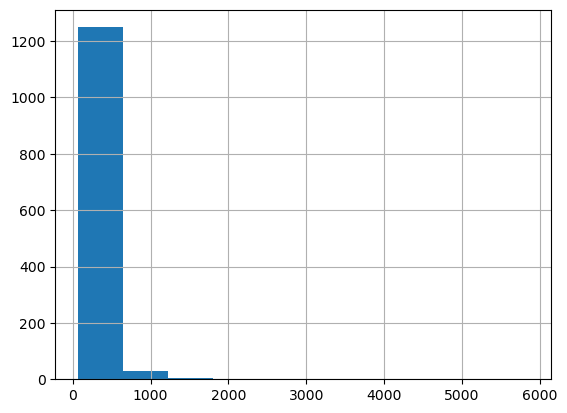

In [47]:
berlin_weekdays.realSum.hist()

<Axes: >

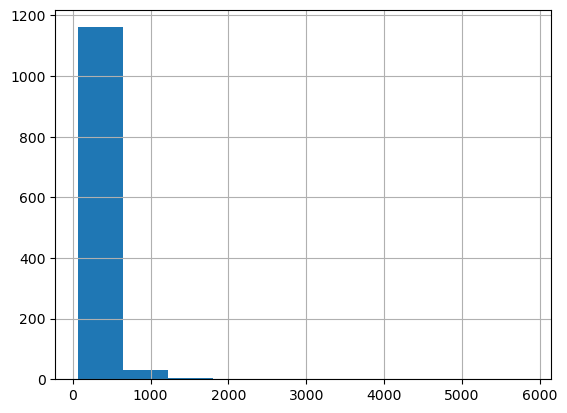

In [48]:
berlin_weekends.realSum.hist()

In [68]:
print(berlin_weekdays.shape)
berlin_weekdays.isnull().count()

(1284, 21)


Unnamed: 0                    1284
realSum                       1284
room_type                     1284
room_shared                   1284
room_private                  1284
person_capacity               1284
host_is_superhost             1284
multi                         1284
biz                           1284
cleanliness_rating            1284
guest_satisfaction_overall    1284
bedrooms                      1284
dist                          1284
metro_dist                    1284
attr_index                    1284
attr_index_norm               1284
rest_index                    1284
rest_index_norm               1284
lng                           1284
lat                           1284
lat_standardized              1284
dtype: int64

In [67]:
print(berlin_weekends.shape)
berlin_weekends.isnull().count()

(1200, 20)


Unnamed: 0                    1200
realSum                       1200
room_type                     1200
room_shared                   1200
room_private                  1200
person_capacity               1200
host_is_superhost             1200
multi                         1200
biz                           1200
cleanliness_rating            1200
guest_satisfaction_overall    1200
bedrooms                      1200
dist                          1200
metro_dist                    1200
attr_index                    1200
attr_index_norm               1200
rest_index                    1200
rest_index_norm               1200
lng                           1200
lat                           1200
dtype: int64

It follows from the above analysis that there are no null entries in the Berlin data for either weekends or weekdays

In [69]:
berlin_weekdays.describe(include = "number")

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,lat_standardized
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1.284000e+03
mean,641.500000,240.220422,2.799844,0.275701,0.183801,9.475078,94.299065,1.084112,5.264371,0.838046,109.798325,16.740928,146.625870,30.233250,13.399500,52.509209,6.706992e-15
std,370.803182,230.318175,1.216142,0.447041,0.387472,0.834843,6.912388,0.571413,3.681616,1.243048,70.027748,10.677116,79.784350,16.450987,0.071955,0.033138,1.000000e+00
min,0.000000,64.971487,2.000000,0.000000,0.000000,4.000000,20.000000,0.000000,0.180926,0.011382,16.600735,2.531111,21.455803,4.424040,13.116320,52.382940,-3.810377e+00
25%,320.750000,143.731887,2.000000,0.000000,0.000000,9.000000,92.000000,1.000000,2.857516,0.274763,68.028312,10.372263,92.151081,19.000922,13.359245,52.491348,-5.390102e-01
50%,641.500000,187.786295,2.000000,0.000000,0.000000,10.000000,96.000000,1.000000,4.300548,0.446999,91.293782,13.919544,131.109757,27.033934,13.407505,52.509280,2.131162e-03
75%,962.250000,277.005235,3.000000,1.000000,0.000000,10.000000,99.000000,1.000000,6.663819,0.806559,131.368925,20.029793,184.380250,38.017945,13.440095,52.530295,6.362919e-01
max,1283.000000,5857.483407,6.000000,1.000000,1.000000,10.000000,100.000000,9.000000,22.617451,13.314108,655.867615,100.000000,484.982156,100.000000,13.707020,52.641410,3.989362e+00


In [70]:
berlin_weekends.describe(include = "number")

,Unnamed: 0,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,249.252516,2.748333,0.276667,0.165000,9.447500,94.350000,1.055833,5.249305,0.833942,110.678263,16.869647,147.143270,31.131043,13.399975,52.509003
std,346.554469,240.584178,1.157345,0.447537,0.371335,0.864793,6.700242,0.530362,3.705937,1.293228,71.390159,10.881330,79.515819,16.823130,0.071666,0.033397
min,0.000000,64.971487,2.000000,0.000000,0.000000,4.000000,40.000000,0.000000,0.218689,0.011376,15.152201,2.309508,19.576924,4.141882,13.116320,52.370000
25%,299.750000,147.237543,2.000000,0.000000,0.000000,9.000000,92.000000,1.000000,2.806652,0.270204,69.043716,10.523684,93.059127,19.688483,13.357943,52.490523
50%,599.500000,192.460503,2.000000,0.000000,0.000000,10.000000,96.000000,1.000000,4.258297,0.452353,90.936896,13.860656,131.055336,27.727325,13.407255,52.509930
75%,899.250000,286.762644,3.000000,1.000000,0.000000,10.000000,99.000000,1.000000,6.666464,0.809572,131.036830,19.972712,187.420309,39.652440,13.440252,52.529910
max,1199.000000,5856.081144,6.000000,1.000000,1.000000,10.000000,100.000000,9.000000,25.284557,14.273577,656.079318,100.000000,472.657692,100.000000,13.711850,52.641410


Proceed with modifying a column of numerical data in some way. I shall do a z-score modification on the distance to the nearest tram as that could be useful while visiting a city (if it's signifcantly further than average) in terms of time and money. Shall do it for both for (probably) no particular reason.

In [72]:
berlin_weekdays['metro_dist_z_score'] = (berlin_weekdays.metro_dist - berlin_weekdays.metro_dist.mean()) / berlin_weekdays.metro_dist.std()

In [73]:
berlin_weekends['metro_dist_z_score'] = (berlin_weekends.metro_dist - berlin_weekends.metro_dist.mean()) / berlin_weekends.metro_dist.std()

In [74]:
berlin_weekdays.metro_dist_z_score.describe()

count    1.284000e+03
mean     4.427058e-17
std      1.000000e+00
min     -6.650299e-01
25%     -4.531469e-01
50%     -3.145871e-01
75%     -2.533113e-02
max      1.003667e+01
Name: metro_dist_z_score, dtype: float64

In [75]:
berlin_weekends.metro_dist_z_score.describe()

count    1.200000e+03
mean    -2.368476e-17
std      1.000000e+00
min     -6.360564e-01
25%     -4.359154e-01
50%     -2.950668e-01
75%     -1.884415e-02
max      1.039232e+01
Name: metro_dist_z_score, dtype: float64

In [102]:
berlin_weekday_metro_dist_outliers = berlin_weekdays.metro_dist_z_score.where(berlin_weekdays.metro_dist_z_score.gt(berlin_weekdays.metro_dist_z_score.quantile(0.97))).sort_values()
berlin_weekday_metro_dist_outliers_2 = berlin_weekday_metro_dist_outliers[berlin_weekday_metro_dist_outliers.notnull()]
berlin_weekday_metro_dist_outliers_2

1216     2.897107
1192     2.956256
478      3.024193
688      3.055743
959      3.141975
1209     3.422588
709      3.447979
671      3.609291
1215     3.710667
511      3.714246
668      3.736763
79       3.740903
9        3.761686
1188     3.834342
1257     3.932581
670      4.006679
1187     4.012517
780      4.140745
1205     4.186326
680      4.223563
703      4.318244
683      4.329833
975      4.365257
1084     4.387388
1197     4.613326
894      4.634873
1206     4.635668
1224     4.717341
699      4.913386
778      5.096514
991      5.403898
1060     5.567321
727      5.687134
676      5.702728
1202     5.912126
1211     6.301119
1196     6.500152
705      7.027632
1283    10.036666
Name: metro_dist_z_score, dtype: float64

From above, we learn that the following entries in the list are more than 3 standard deviations away from your standard distance to a tram. Thus, we should avoid these entries as they are in the rare few which are so far. These may be marketed as being in the country, and perhaps used as a selling point for the airbnb. Additionally, I demonstrate how you might avoid null or NaN entries in data. In the case of missing values, you can often replace them with a null object or a known object to avoid (such as -100000). 

*478      3.024193

*688      3.055743

*959      3.141975

*1209     3.422588

*709      3.447979

*671      3.609291

*1215     3.710667

*511      3.714246

*668      3.736763

*79       3.740903

*9        3.761686

*1188     3.834342

*1257     3.932581

*670      4.006679

*1187     4.012517

*780      4.140745

*1205     4.186326

*680      4.223563

*703      4.318244

*683      4.329833

*975      4.365257

*1084     4.387388

*1197     4.613326

*894      4.634873

*1206     4.635668

*1224     4.717341

*699      4.913386

*778      5.096514

*991      5.403898

*1060     5.567321

*727      5.687134

*676      5.702728

*1202     5.912126

*1211     6.301119

*1196     6.500152

*705      7.027632

*1283    10.036666